In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
stock = pd.read_csv(r'C:\Users\hp\CORIZO MINI PROJECT\Stock Price Detection\Stock_Price_data_set.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [4]:
# Converting Date Column to datetime format using datetime libraary in pandas
stock['Date'] = pd.to_datetime(stock['Date'])
stock['Date']

0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

In [5]:
print("Dataframe contains stock prices between {0} and {1}".format(stock.Date.min(), stock.Date.max()))
print("Total days = {0} days".format((stock.Date.max() - stock.Date.min()).days))

Dataframe contains stock prices between 2018-02-05 00:00:00 and 2022-02-04 00:00:00
Total days = 1460 days


In [6]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


<AxesSubplot:>

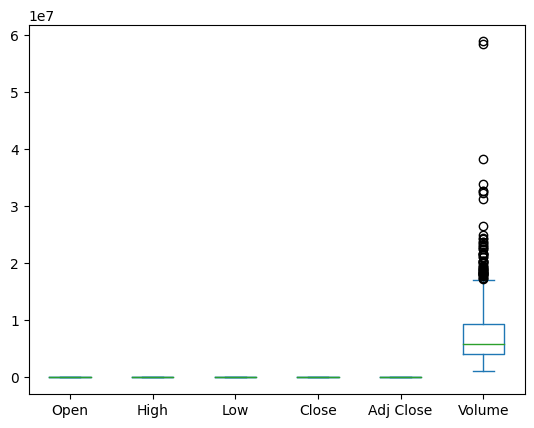

In [7]:
stock[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].plot(kind='box')
# stock['Volume'].plot(kind='box')
# sns.boxplot(data=stock)

In [8]:
# Setting the layout for the plot

layout = go.Layout(
         title = 'Stock Prices of given stock',
         xaxis = dict(
                 title = 'Date',
                 titlefont = dict(
                             family = 'Courier New, monospace',
                             size = 18,
                             color = '#7f7f7f')
                     ),
         yaxis = dict(
                 title = 'Price',
                 titlefont = dict(
                             family = 'Courier New, monospace',
                             size = 18,
                             color = '#7f7f7f')
                     )
                 )
stock_data = [{'x': stock['Date'], 'y':stock['Close']}]
plot = go.Figure(data=stock_data, layout=layout)

In [9]:
# X, y = stock['Date'], stock['Close']
# plt.xticks(rotation=45)
# plt.plot(X, y, '#1fd655')

iplot(plot)

In [10]:
# Building regression model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
# Splitting the data into train and test sets
X = np.array(stock.index).reshape(-1, 1)
Y = stock['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


In [12]:
# Feature Scaling
scaler = StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [15]:
# Plotting actual and predicted values for train dataset

trace0 = go.Scatter(
     x = X_train.T[0],
     y = Y_train,
  mode = 'markers',
  name = 'Actual')

trace1 = go.Scatter(
     x = X_train.T[0],
     y = lm.predict(X_train).T,
  mode = 'lines',
  name = 'Predicted')

stock_data = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=stock_data, layout=layout)


In [16]:
iplot(plot2)

In [17]:
# Calculate scores for model evaluation

scores = f"""
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
"""
print(scores)


Metric           Train                Test        
r2_score  0.7028958230325895	0.7274982898502823
MSE       3434.5839374687735	3359.5269242393792

